# Final Project - ANN
- Eon Sik Jeong<br>
- April 23rd, 2020<br>
- Credit to Dr. Stansbury for ideas of metrics, analysis, code snippets, and sample algorithms that were modified
- Credit to Yahoo Finances & Kaggle for stock datasets
- https://www.kaggle.com/dgawlik/nyse
- https://finance.yahoo.com/


## Imports
---

In [30]:
import pandas
import numpy
import matplotlib.pyplot
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

#In case keras not installed:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

## Read CSV
---

In [31]:
data = pandas.read_csv('stockdata/005930.KS.csv') 
#5 year stock data of Samsung as an example. 
# Use stockdata/^DJI.csv, ^GSPC.csv, or ^IXIC.csv for other datasets such as Daw Jones, NASDAQ, and S&P 500.
data.head() #Display head

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-11,28380,29580,28360,29480,285.887604,21108650
1,2015-03-12,29200,29460,28940,28940,280.650879,19153200
2,2015-03-13,29220,29580,29100,29140,282.590424,9413100
3,2015-03-16,29160,29740,29100,29400,285.111786,8974550
4,2015-03-17,29400,30000,29200,29940,290.348572,13661150


## Compute Mid Price
---

In [32]:
price_high = data['High'].values #high prices
price_low = data['Low'].values #low prices
price_mid = (price_high + price_low) / 2 #Average

## Generate Windows
---

In [33]:
sequence = 50 #Window Size
sequence_length = sequence + 1

result = []
for index in range(len(price_mid) - sequence_length):
    result.append(price_mid[index: index + sequence_length])

## Data Normalization
---

In [34]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window] #Setting first window = 0, - 1
    normalized_data.append(normalized_window)

result = numpy.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9)) # Training set = 90%, Test set = 10%
train = result[:row, :]
numpy.random.shuffle(train) #Setting training set = random 

x_train = train[:, :-1]
x_train = numpy.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = numpy.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1056, 50, 1), (117, 50, 1))

## Building Models
---

In [35]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


## Training Phase
---

In [36]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Train on 1056 samples, validate on 117 samples
Epoch 1/20
1056/1056 [==============================] - 3s 3ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 2/20
1056/1056 [==============================] - 2s 2ms/step - loss: 6.7934e-04 - val_loss: 5.8113e-04
Epoch 3/20
1056/1056 [==============================] - 2s 2ms/step - loss: 4.8072e-04 - val_loss: 5.3747e-04
Epoch 4/20
1056/1056 [==============================] - 2s 2ms/step - loss: 3.8161e-04 - val_loss: 3.9302e-04
Epoch 5/20
1056/1056 [==============================] - 2s 2ms/step - loss: 3.0176e-04 - val_loss: 3.2572e-04
Epoch 6/20
1056/1056 [==============================] - 2s 2ms/step - loss: 2.6258e-04 - val_loss: 5.0544e-04
Epoch 7/20
1056/1056 [==============================] - 2s 2ms/step - loss: 2.4408e-04 - val_loss: 2.5923e-04
Epoch 8/20
1056/1056 [==============================] - 2s 2ms/step - loss: 2.4920e-04 - val_loss: 2.8191e-04
Epoch 9/20
1056/1056 [==============================] - 2s 2ms/step - loss: 2.346

## Result
---

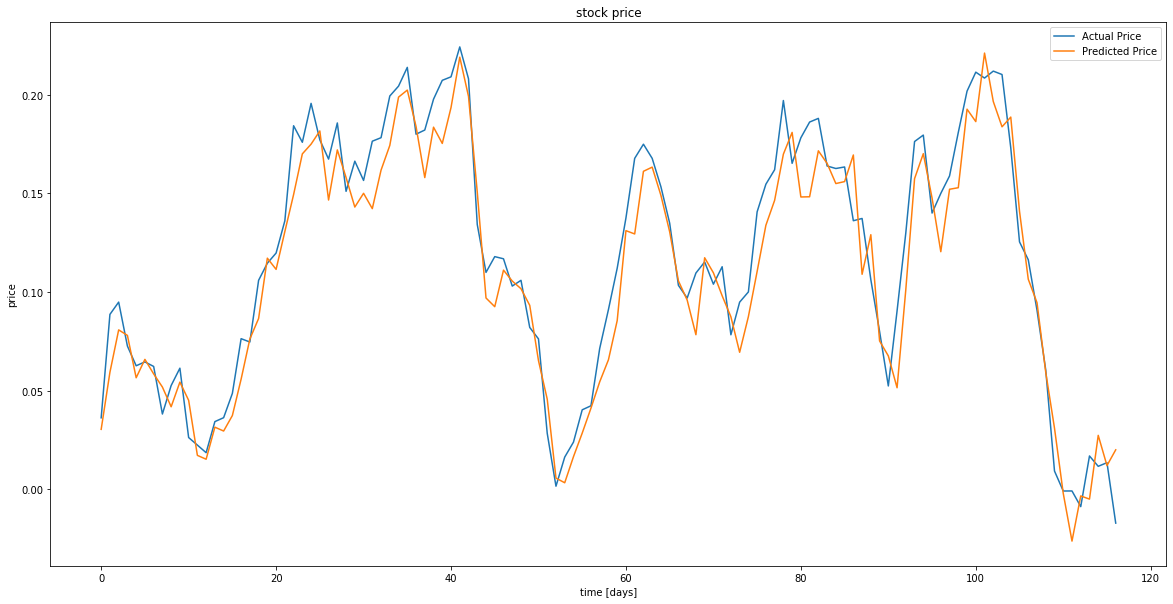

In [42]:
predicted = model.predict(x_test)
fig = matplotlib.pyplot.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='Actual Price')
ax.plot(predicted, label='Predicted Price')
ax.legend()
matplotlib.pyplot.title('stock price')
matplotlib.pyplot.xlabel('time [days]')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.show()
#print(predicted)